In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold , cross_val_score  #for estimating test error

In [23]:
dataset = pd.read_excel("C:/Users/maryam/Desktop/term 7/tahlil dade/ta/pythone/python project/AutoDataset.xlsx")
dataset = pd.DataFrame(dataset)
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [24]:
dataset.isnull().sum()
dataset = dataset.drop(['name'] , axis = 1 )
#print (dataset)

# A

In [25]:
mpg01 = np.zeros(398)
mpg01 = np.array(mpg01)
datampg = dataset.mpg
median = statistics.median(datampg)
for i in range (0,398):
    if datampg[i]>=median :
        mpg01[i]=1
    else :
        mpg01[i]=0
        

dataset['mpg01'] = mpg01


#print(mpg01)
print (dataset)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
393  27.0          4         140.0          86    2790          15.6    82   
394  44.0          4          97.0          52    2130          24.6    82   
395  32.0          4         135.0          84    2295          11.6    82   
396  28.0          4         120.0          79    2625          18.6    82   
397  31.0          4         119.0          82    2720          19.4    82   

     origin  mpg01  
0         1    0.0  
1         1    0.0  


# B

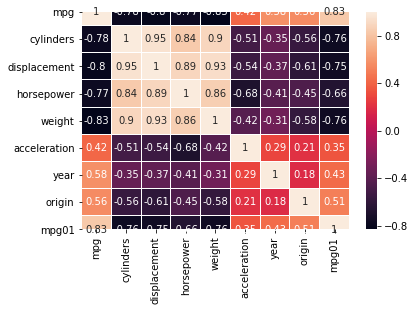

In [26]:
corr = dataset.corr()
sns.heatmap(corr,annot= True , linewidth = 0.1)
plt.show()
#هرچه خانه ها پررنگ تر باشند یعنی دو متغیر بیشتر روی یکدیگر تاثیر دارند

# C

In [27]:
x = dataset.drop('mpg01',  axis = 1)
y = dataset['mpg01']
x_train , x_test , y_train , y_test = train_test_split (x,y,test_size = 0.2 , random_state = 1)


# D

In [28]:
lda= LDA()
lda.fit(x_train , y_train)
lda_pred = lda.predict(x_test)
lda_confu_matrics = confusion_matrix(y_test , lda_pred)
acc_lda = lda.score(x_test , y_test)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_lda = cross_val_score (lda , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)

sum_lda = 0
for i in range(0,5):
    sum_lda += cv_lda[i]
kfoldcv_lda = sum_lda / 5


print(acc_lda)
print(lda_confu_matrics)
print (kfoldcv_lda)


0.925
[[35  4]
 [ 2 39]]
0.9321202531645569


# E

In [29]:
qda = QDA()
qda.fit(x_train , y_train)
qda_pred = qda.predict(x_test)
qda_confu_matrics = confusion_matrix(y_test , qda_pred)
acc_qda = qda.score(x_test , y_test)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_qda = cross_val_score (qda , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)

sum_qda = 0
for i in range(0,5):
    sum_qda += cv_qda[i]
kfoldcv_qda = sum_qda / 5


print(acc_qda)
print(qda_confu_matrics)
print (kfoldcv_qda)


0.9375
[[36  3]
 [ 2 39]]
0.9372151898734176


# F

In [30]:
lr = LogisticRegression ()
lr.fit(x_train , y_train)
log_pred = lr.predict(x_test)
acc_log = lr.score(x_test , y_test)
log_confu_matrics = confusion_matrix(y_test , log_pred)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_log = cross_val_score (lr , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)


sum_log = 0
for i in range(0,5):
    sum_log += cv_log[i]
kfoldcv_log = sum_log / 5


print(acc_log)
print(log_confu_matrics)
print (kfoldcv_log)

0.95
[[36  3]
 [ 1 40]]
0.9648417721518987


C:\Users\maryam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# G

In [31]:
print ('N = 3\n')
knn  = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
acc_knn = knn.score(x_test , y_test)
knn_pred = knn.predict(x_test)
knn_confu_matrics = confusion_matrix(y_test , knn_pred)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_knn = cross_val_score (knn , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)

sum_knn = 0
for i in range(0,5):
    sum_knn += cv_knn[i]
kfoldcv_knn = sum_knn / 5

print(acc_knn)
print(knn_confu_matrics)
print (kfoldcv_knn)
##############################################################################################
print ('\nN = 5\n')
knn  = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train, y_train)
acc_knn = knn.score(x_test , y_test)
knn_pred = knn.predict(x_test)
knn_confu_matrics = confusion_matrix(y_test , knn_pred)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_knn = cross_val_score (knn , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)

sum_knn = 0
for i in range(0,5):
    sum_knn += cv_knn[i]
kfoldcv_knn = sum_knn / 5

print(acc_knn)
print(knn_confu_matrics)
print (kfoldcv_knn)
##################################################################################################
print ('\nN = 10\n')
knn  = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train, y_train)
acc_knn = knn.score(x_test , y_test)
knn_pred = knn.predict(x_test)
knn_confu_matrics = confusion_matrix(y_test , knn_pred)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_knn = cross_val_score (knn , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)

sum_knn = 0
for i in range(0,5):
    sum_knn += cv_knn[i]
kfoldcv_knn = sum_knn / 5

print(acc_knn)
print(knn_confu_matrics)
print (kfoldcv_knn)
####################################################################################################
print ('\nN = 25\n')
knn  = KNeighborsClassifier(n_neighbors= 25)
knn.fit(x_train, y_train)
acc_knn = knn.score(x_test , y_test)
knn_pred = knn.predict(x_test)
knn_confu_matrics = confusion_matrix(y_test , knn_pred)
cv  = KFold(n_splits = 5 , random_state = 1 , shuffle = True)
cv_knn = cross_val_score (knn , x , y ,scoring = 'accuracy' , cv=cv , n_jobs = -1)

sum_knn = 0
for i in range(0,5):
    sum_knn += cv_knn[i]
kfoldcv_knn = sum_knn / 5

print(acc_knn)
print(knn_confu_matrics)
print (kfoldcv_knn)

#the k that havw minimom of the test error (5-fold cross validation) will be choose---choose n = 3



N = 3

0.8875
[[33  6]
 [ 3 38]]
0.8818987341772152

N = 5

0.9125
[[33  6]
 [ 1 40]]
0.8918987341772151

N = 10

0.9
[[34  5]
 [ 3 38]]
0.8743354430379748

N = 25

0.9
[[35  4]
 [ 4 37]]
0.8643037974683544
